# <font color = red> Importing Libraries And Loading Data Set </font>

In [1]:
# Importing required libraries
import pandas as pd  # For handling data
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For statistical visualizations

# Loading the datasets
app_df = pd.read_csv("application_data.csv")  # Main dataset
pd.set_option("display.max_columns", None)
prev_app_df = pd.read_csv("previous_application.csv")  # Previous application dataset
pd.set_option("display.max_columns", None)

# Displaying basic information
print("Application Data Information:")
print(app_df.info())
print("\nPrevious Application Data Information:")
print(prev_app_df.info())

# Preview the first few rows
app_df.head()
prev_app_df.head()

Application Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254336 entries, 0 to 254335
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(87), int64(19), object(16)
memory usage: 236.7+ MB
None

Previous Application Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552579 entries, 0 to 552578
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_PREV                   552579 non-null  int64  
 1   SK_ID_CURR                   552579 non-null  int64  
 2   NAME_CONTRACT_TYPE           552579 non-null  object 
 3   AMT_ANNUITY                  429955 non-null  float64
 4   AMT_APPLICATION              552579 non-null  float64
 5   AMT_CREDIT                   552579 non-null  float64
 6   AMT_DOWN_PAYMENT             258707 non-null  float64
 7   AMT_GOODS_PRICE              426013 non-null  float64
 8   WEEKDAY_APP

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15.0,Y,1.0,0.0,0.182832,0.867336,XAP,Approved,-73.0,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35.0,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11.0,Y,1.0,NaN,NaN,NaN,XNA,Approved,-164.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1.0,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11.0,Y,1.0,NaN,NaN,NaN,XNA,Approved,-301.0,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7.0,Y,1.0,NaN,NaN,NaN,XNA,Approved,-512.0,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9.0,Y,1.0,NaN,NaN,NaN,Repairs,Refused,-781.0,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1.0,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
app_df.shape


(254336, 122)

In [3]:
prev_app_df.shape

(552579, 37)

# <font color = red> Data Cleaning </font>

In [4]:
# Fixing Column Names
# Standardize column names
app_df.columns = app_df.columns.str.lower().str.replace(" ", "_")
prev_app_df.columns = prev_app_df.columns.str.lower().str.replace(" ", "_")

# Verify changes
print("Updated column names:", app_df.columns)

Updated column names: Index(['sk_id_curr', 'target', 'name_contract_type', 'code_gender',
       'flag_own_car', 'flag_own_realty', 'cnt_children', 'amt_income_total',
       'amt_credit', 'amt_annuity',
       ...
       'flag_document_18', 'flag_document_19', 'flag_document_20',
       'flag_document_21', 'amt_req_credit_bureau_hour',
       'amt_req_credit_bureau_day', 'amt_req_credit_bureau_week',
       'amt_req_credit_bureau_mon', 'amt_req_credit_bureau_qrt',
       'amt_req_credit_bureau_year'],
      dtype='object', length=122)


In [5]:
print("Updated column names:", prev_app_df.columns)

Updated column names: Index(['sk_id_prev', 'sk_id_curr', 'name_contract_type', 'amt_annuity',
       'amt_application', 'amt_credit', 'amt_down_payment', 'amt_goods_price',
       'weekday_appr_process_start', 'hour_appr_process_start',
       'flag_last_appl_per_contract', 'nflag_last_appl_in_day',
       'rate_down_payment', 'rate_interest_primary',
       'rate_interest_privileged', 'name_cash_loan_purpose',
       'name_contract_status', 'days_decision', 'name_payment_type',
       'code_reject_reason', 'name_type_suite', 'name_client_type',
       'name_goods_category', 'name_portfolio', 'name_product_type',
       'channel_type', 'sellerplace_area', 'name_seller_industry',
       'cnt_payment', 'name_yield_group', 'product_combination',
       'days_first_drawing', 'days_first_due', 'days_last_due_1st_version',
       'days_last_due', 'days_termination', 'nflag_insured_on_approval'],
      dtype='object')


 <font color = red> Handling Missing Values </font>

In [6]:
# Check missing values
missing_values = app_df.isnull().sum()
missing_percentage = (missing_values / len(app_df)) * 100

# Create a DataFrame to analyze missing values
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data = missing_data[missing_data['Percentage'] > 0].sort_values(by='Percentage', ascending=False)
print("Columns with missing values:")
print(missing_data)

# Drop columns with more than 40% missing values
app_df = app_df.drop(columns=missing_data[missing_data['Percentage'] > 40].index)

# Fill numerical missing values with median
num_cols = app_df.select_dtypes(include=['number']).columns
app_df[num_cols] = app_df[num_cols].fillna(app_df[num_cols].median())

# Fill categorical missing values with mode
cat_cols = app_df.select_dtypes(include=['object']).columns
app_df[cat_cols] = app_df[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))

Columns with missing values:
                          Missing Values  Percentage
commonarea_medi                   177806   69.909883
commonarea_avg                    177806   69.909883
commonarea_mode                   177806   69.909883
nonlivingapartments_avg           176645   69.453400
nonlivingapartments_medi          176645   69.453400
...                                  ...         ...
flag_document_8                        1    0.000393
flag_document_7                        1    0.000393
flag_document_6                        1    0.000393
flag_document_5                        1    0.000393
flag_document_11                       1    0.000393

[90 rows x 2 columns]


<font color = red> Handling outliers </font>

In [7]:
# List all numerical columns
num_cols = app_df.select_dtypes(include=['number']).columns
print("Numerical columns:", num_cols)

Numerical columns: Index(['sk_id_curr', 'target', 'cnt_children', 'amt_income_total',
       'amt_credit', 'amt_annuity', 'amt_goods_price',
       'region_population_relative', 'days_birth', 'days_employed',
       'days_registration', 'days_id_publish', 'flag_mobil', 'flag_emp_phone',
       'flag_work_phone', 'flag_cont_mobile', 'flag_phone', 'flag_email',
       'cnt_fam_members', 'region_rating_client',
       'region_rating_client_w_city', 'hour_appr_process_start',
       'reg_region_not_live_region', 'reg_region_not_work_region',
       'live_region_not_work_region', 'reg_city_not_live_city',
       'reg_city_not_work_city', 'live_city_not_work_city', 'ext_source_2',
       'ext_source_3', 'obs_30_cnt_social_circle', 'def_30_cnt_social_circle',
       'obs_60_cnt_social_circle', 'def_60_cnt_social_circle',
       'days_last_phone_change', 'flag_document_2', 'flag_document_3',
       'flag_document_4', 'flag_document_5', 'flag_document_6',
       'flag_document_7', 'flag_documen

In [8]:
# Outliers:
def outliers(x):
    plt.figure(figsize = [9,2])
    sns.boxplot(x)
    plt.show() # No outliers


In [9]:
app_df["age"] = abs(app_df["days_birth"]) / 365  # Convert days to years

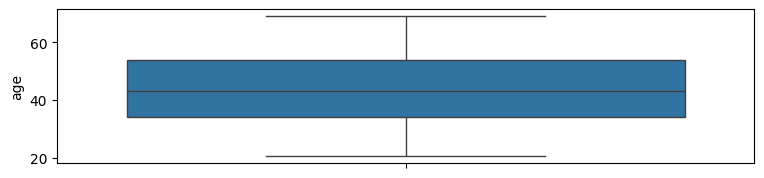

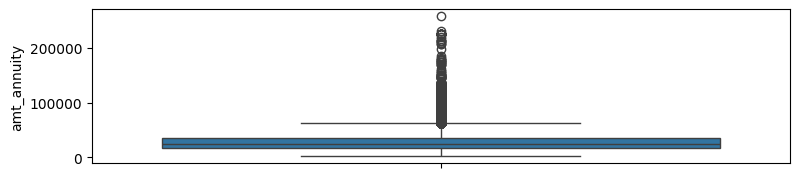

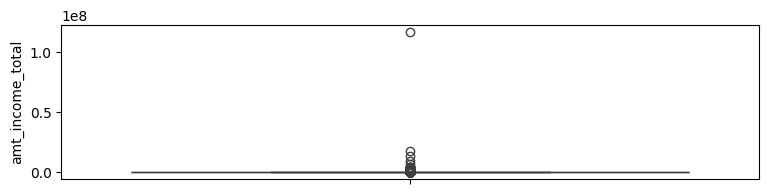

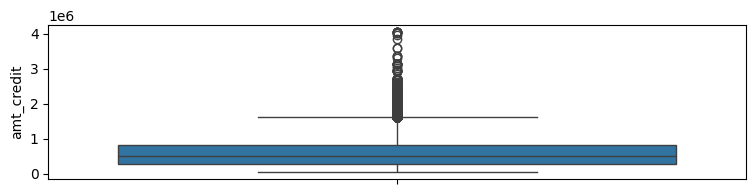

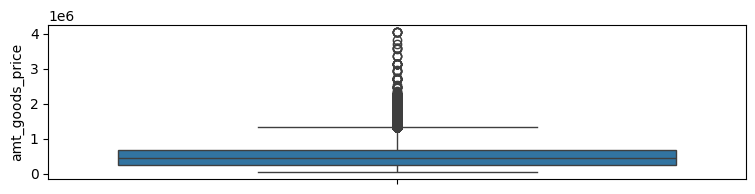

In [10]:
outliers(app_df.age)
outliers(app_df.amt_annuity)
outliers(app_df.amt_income_total)
outliers(app_df.amt_credit)
outliers(app_df.amt_goods_price)

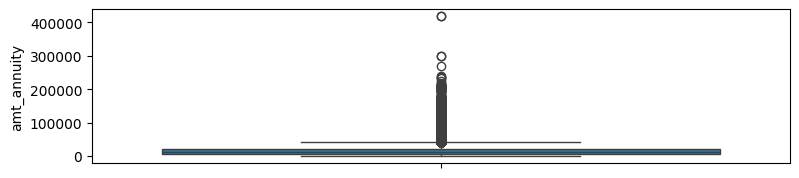

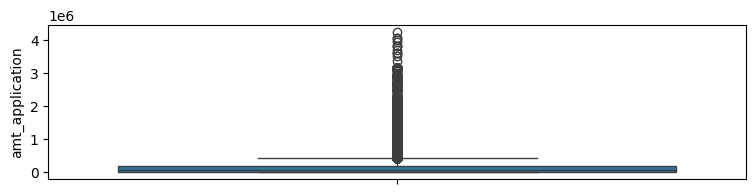

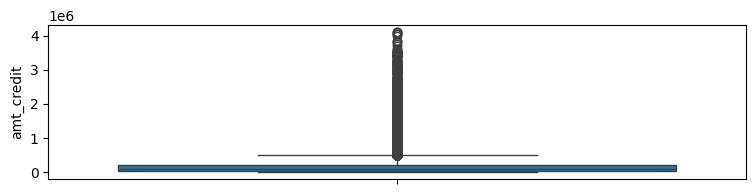

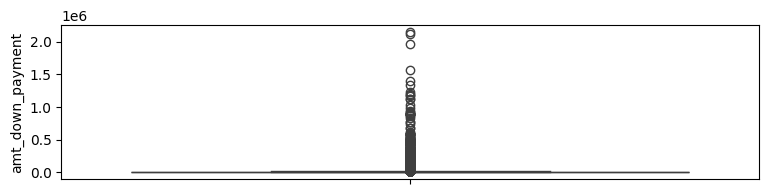

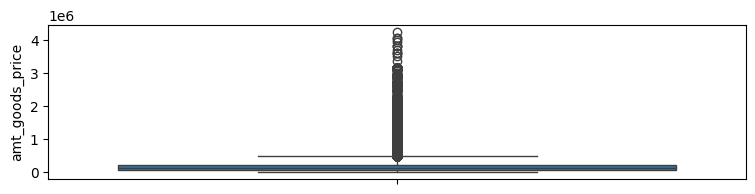

In [11]:
outliers(prev_app_df.amt_annuity)
outliers(prev_app_df.amt_application)
outliers(prev_app_df.amt_credit)
outliers(prev_app_df.amt_down_payment)
outliers(prev_app_df.amt_goods_price)

In [12]:
#print(prev_app_df.columns)

In [13]:
#print(app_df.columns)

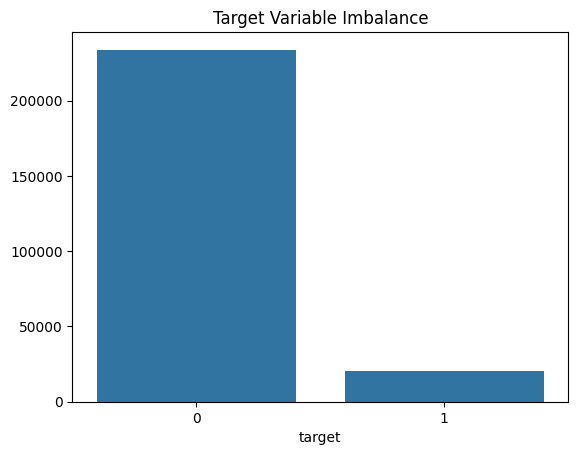

In [14]:
# Data Imbalance
target_counts = app_df['target'].value_counts()
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title('Target Variable Imbalance')
plt.show()

In [15]:
#Splitting df
defaulters = app_df[app_df.target == 1]
others = app_df[app_df.target == 0]

In [16]:
print(defaulters.shape)
print(others.shape)

(20611, 74)
(233725, 74)


<font color = red> Fixing Invalid Values</font>

In [17]:
# Remove negative income values
app_df = app_df[app_df["amt_income_total"] > 0]

# Filter out unrealistic age values
app_df = app_df[app_df["days_birth"] / -365 <= 100]


In [18]:
# Filter applicants with approved or refused loans
filtered_df = app_df[app_df["name_contract_type"].isin(["approved", "refused"])]

print("Filtered data shape:", filtered_df.shape)

Filtered data shape: (0, 74)


# <font color = red> Univariate Analysis</font>

<font color= red> Categorical Unordered Univariate Analysis </font>

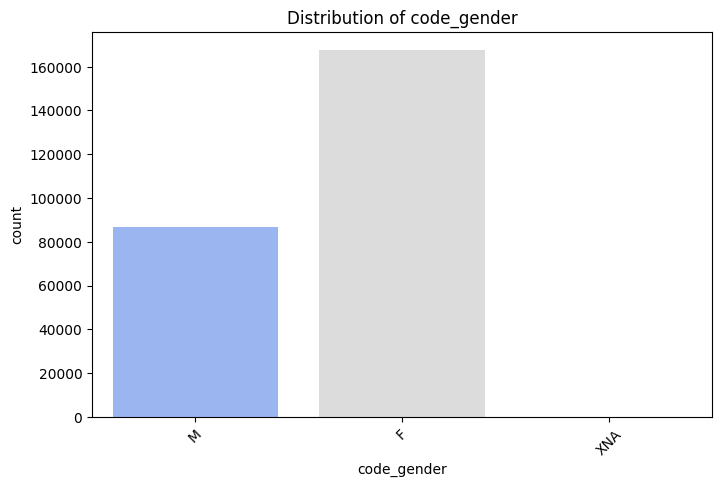

In [19]:
def categorical_unordered_analysis(df, column):
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column, hue=column, palette="coolwarm", legend=False)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {column}")
    plt.show()


categorical_unordered_analysis(app_df, "code_gender")  # Example: Gender distribution

<font color = red> Categorical ordered Univariate Analysis </font>

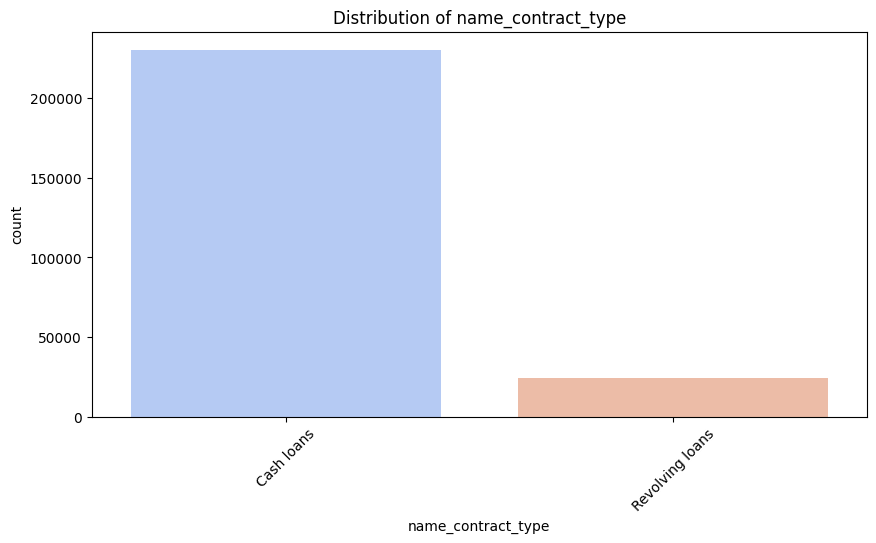

In [20]:
def plot_categorical_distribution(df, column, order=None):
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=column, order=order, hue=column, palette="coolwarm", legend=False)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {column}")
    plt.show()


plot_categorical_distribution(app_df, "name_contract_type")


<font color= red> Statistics on Numerical Features </font>

In [21]:
def numerical_statistics(df):
    summary = df.describe().T  # Transpose for better readability
    return summary


numerical_statistics(app_df)

,count,mean,std,min,25%,50%,75%,max
sk_id_curr,254336.0,247398.038890,85020.304689,100002.000000,173734.75000,247473.500000,321179.250000,3.943060e+05
target,254336.0,0.081038,0.272895,0.000000,0.00000,0.000000,0.000000,1.000000e+00
cnt_children,254336.0,0.416960,0.722026,0.000000,0.00000,0.000000,1.000000,1.900000e+01
amt_income_total,254336.0,168826.487444,256709.379061,25650.000000,112500.00000,146250.000000,202500.000000,1.170000e+08
amt_credit,254336.0,598491.967797,401919.518503,45000.000000,270000.00000,512446.500000,808650.000000,4.050000e+06
...,...,...,...,...,...,...,...,...
amt_req_credit_bureau_week,254336.0,0.030074,0.192911,0.000000,0.00000,0.000000,0.000000,8.000000e+00
amt_req_credit_bureau_mon,254336.0,0.231190,0.853054,0.000000,0.00000,0.000000,0.000000,2.700000e+01
amt_req_credit_bureau_qrt,254336.0,0.230714,0.775312,0.000000,0.00000,0.000000,0.000000,2.610000e+02
amt_req_credit_bureau_year,254336.0,1.782402,1.765993,0.000000,1.00000,1.000000,3.000000,2.500000e+01


# <font color = red> Bivariate Analysis</font>

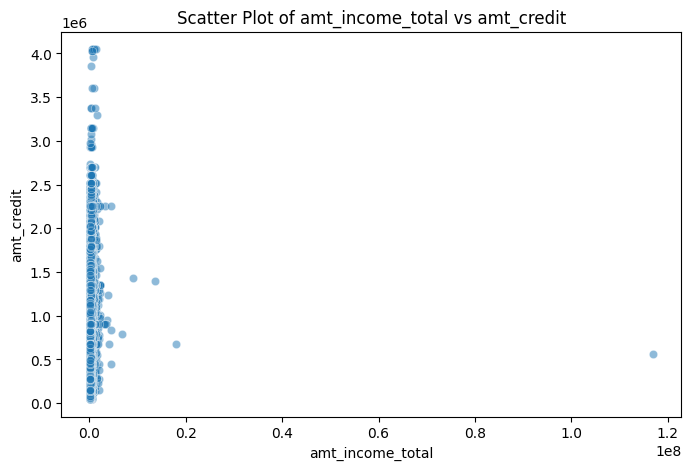

In [22]:
def numeric_numeric_analysis(df, col1, col2):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=col1, y=col2, alpha=0.5)
    plt.title(f"Scatter Plot of {col1} vs {col2}")
    plt.show()


numeric_numeric_analysis(app_df, "amt_income_total", "amt_credit")

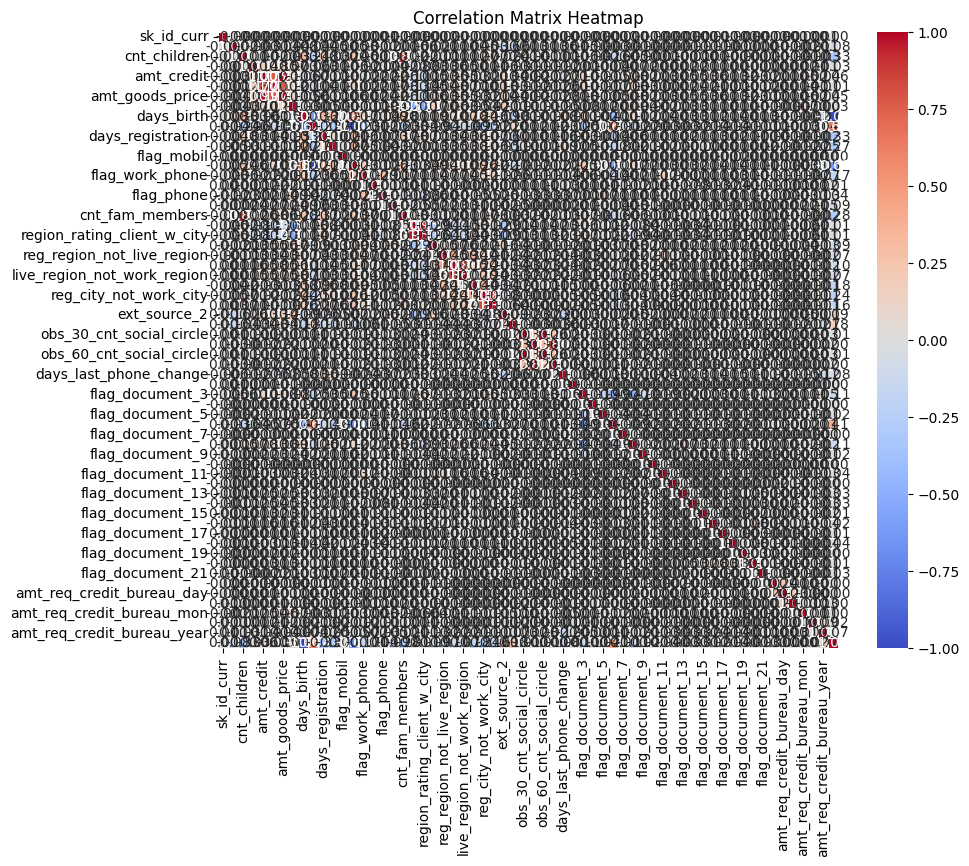

In [23]:
def correlation_heatmap(df):
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
    plt.title("Correlation Matrix Heatmap")
    plt.show()


correlation_heatmap(app_df.select_dtypes(include=['number']))  # Only numerical features

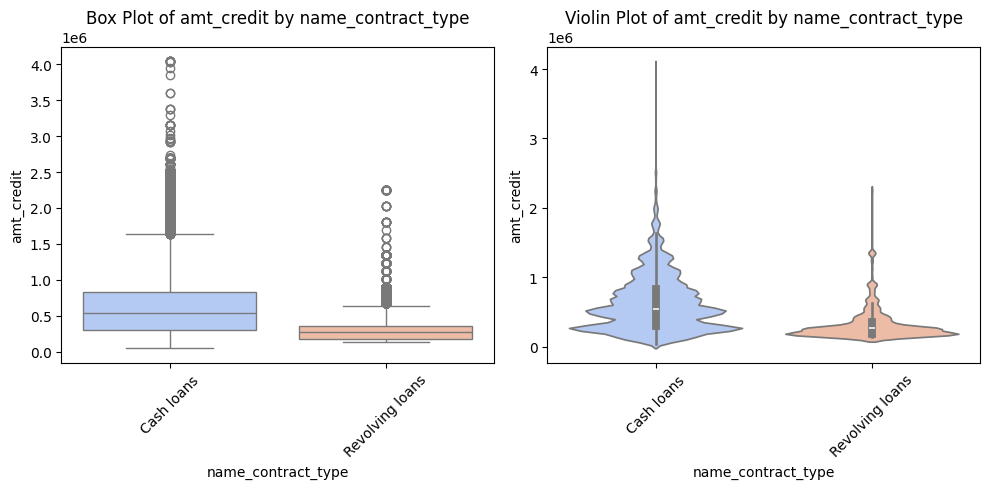

In [24]:
def numerical_categorical_analysis(df, num_col, cat_col):
    plt.figure(figsize=(10, 5))

    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, x=cat_col, y=num_col, hue=cat_col, palette="coolwarm", legend=False)
    plt.xticks(rotation=45)
    plt.title(f"Box Plot of {num_col} by {cat_col}")

    # Violin plot
    plt.subplot(1, 2, 2)
    sns.violinplot(data=df, x=cat_col, y=num_col, hue=cat_col, palette="coolwarm", legend=False)
    plt.xticks(rotation=45)
    plt.title(f"Violin Plot of {num_col} by {cat_col}")

    plt.tight_layout()
    plt.show()


numerical_categorical_analysis(app_df, "amt_credit", "name_contract_type")


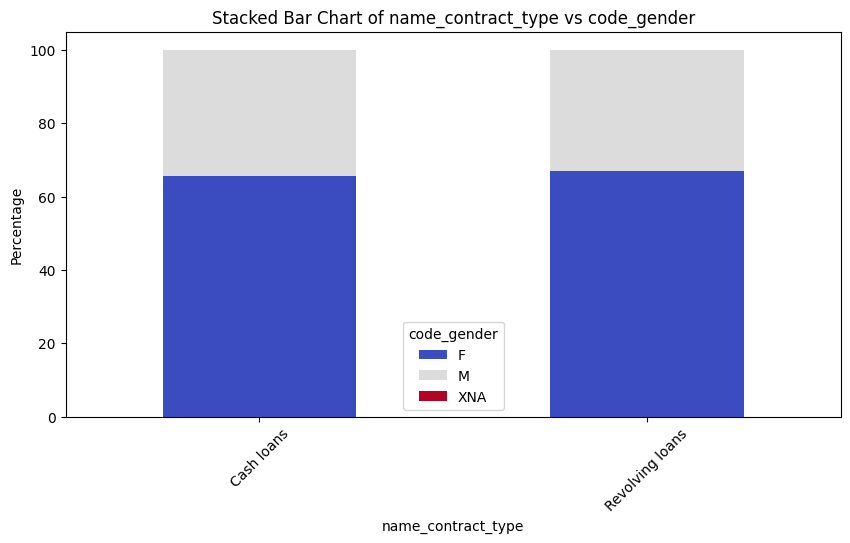

In [25]:
def categorical_categorical_analysis(df, cat_col1, cat_col2):
    cross_tab = pd.crosstab(df[cat_col1], df[cat_col2], normalize="index") * 100
    cross_tab.plot(kind="bar", stacked=True, colormap="coolwarm", figsize=(10, 5))
    plt.title(f"Stacked Bar Chart of {cat_col1} vs {cat_col2}")
    plt.ylabel("Percentage")
    plt.xticks(rotation=45)
    plt.legend(title=cat_col2)
    plt.show()


categorical_categorical_analysis(app_df, "name_contract_type", "code_gender")

# <font color = red> Multivariate Analysis</font>

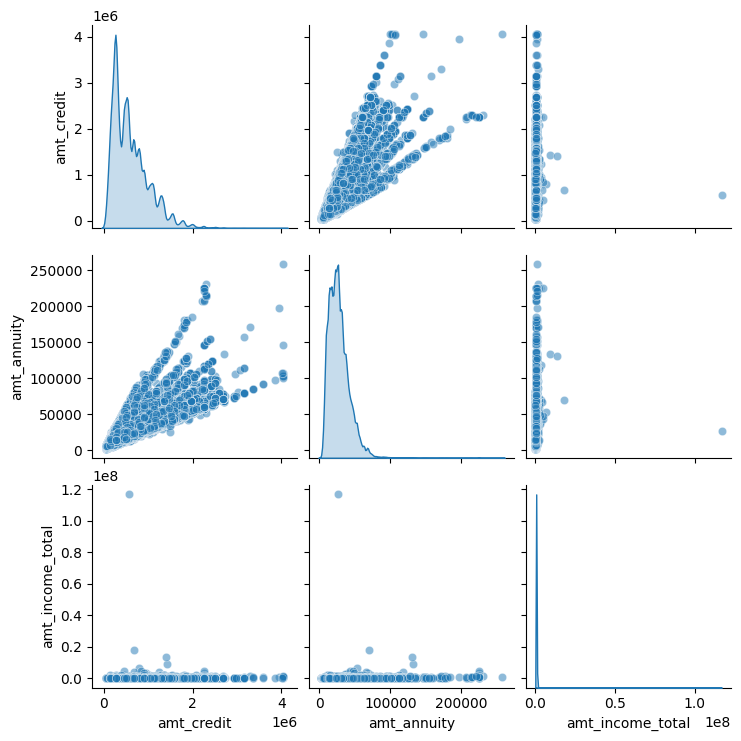

In [26]:
def pairplot_analysis(df, columns):
    sns.pairplot(df[columns], diag_kind="kde", plot_kws={'alpha': 0.5})
    plt.show()


pairplot_analysis(app_df, ["amt_credit", "amt_annuity", "amt_income_total"])

Explained Variance Ratio: [0.61086399 0.31272856]


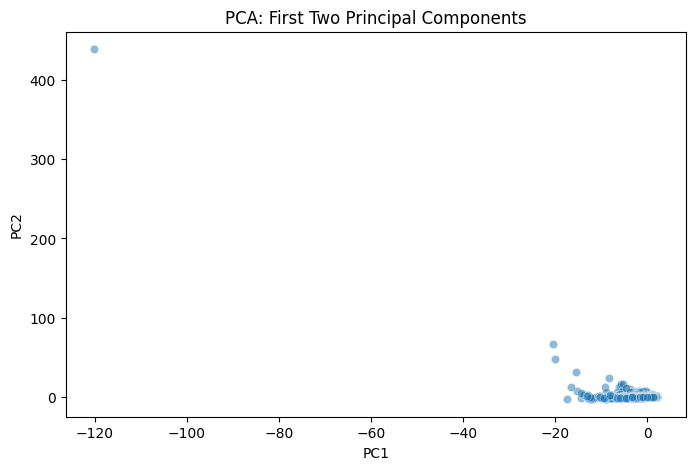

In [27]:
def pca_manual(df, num_cols, n_components=2):
    # Standardizing the data (zero mean, unit variance)
    data = df[num_cols]
    data = (data - data.mean()) / data.std()

    # Compute covariance matrix
    covariance_matrix = np.cov(data.T)

    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # Sort eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Select top n_components
    selected_vectors = eigenvectors[:, :n_components]

    # Project data onto principal components
    principal_components = np.dot(data, selected_vectors)

    # Convert to DataFrame
    pca_df = pd.DataFrame(principal_components, columns=[f"PC{i+1}" for i in range(n_components)])

    print(f"Explained Variance Ratio: {eigenvalues[:n_components] / eigenvalues.sum()}")

    # Scatter plot of first two principal components
    if n_components >= 2:
        plt.figure(figsize=(8, 5))
        sns.scatterplot(x=pca_df["PC1"], y=pca_df["PC2"], alpha=0.5)
        plt.title("PCA: First Two Principal Components")
        plt.show()


pca_manual(app_df, ["amt_credit", "amt_annuity", "amt_income_total"])

##<font color = blue> Conclusion

Because of the imbalance in the data, the results may not be fully definitive. However, the analysis highlights several key factors that contribute to loan default, including:

Loan Amount: Higher loan amounts are associated with an increased risk of default.

Income Level: Applicants with lower income tend to have a higher likelihood of defaulting.

Credit History: Individuals with poor or limited credit history show a greater tendency to default.

Previous Loan Status: Applicants with previously rejected loans exhibit a higher probability of default.

Debt-to-Income Ratio: A higher ratio indicates financial strain, making default more likely.

